In [1]:
import pandas as pd
import os

data_dir = './data'
data=pd.read_csv(os.path.join(data_dir, 'healthcare-dataset-stroke-data.csv'))
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
data=data.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


[0, 4, 5, 6, 9]

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

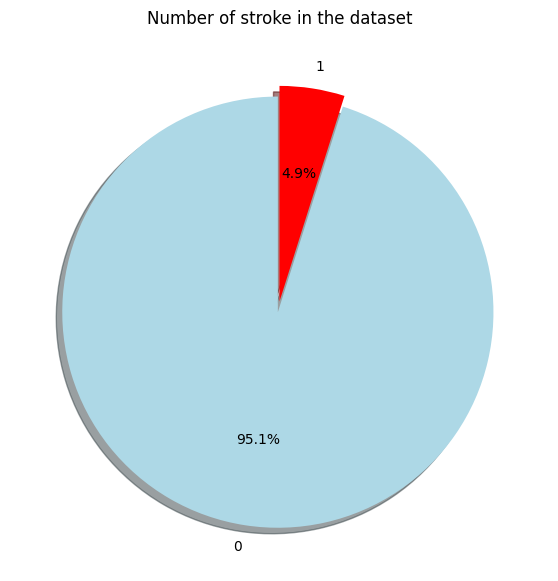

In [6]:
import matplotlib.pyplot as plt
labels =data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
#  Using Lable encoding
le = LabelEncoder()
en_df = data.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [8]:
import seaborn as sns
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

C:\Users\62687\AppData\Local\Temp\ipykernel_25536\2208830148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, bins=bins,ax=ax)
C:\Users\62687\AppData\Local\Temp\ipykernel_25536\2208830148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, bins=bins,ax=ax)
C:\Users\62687\AppData\Loc

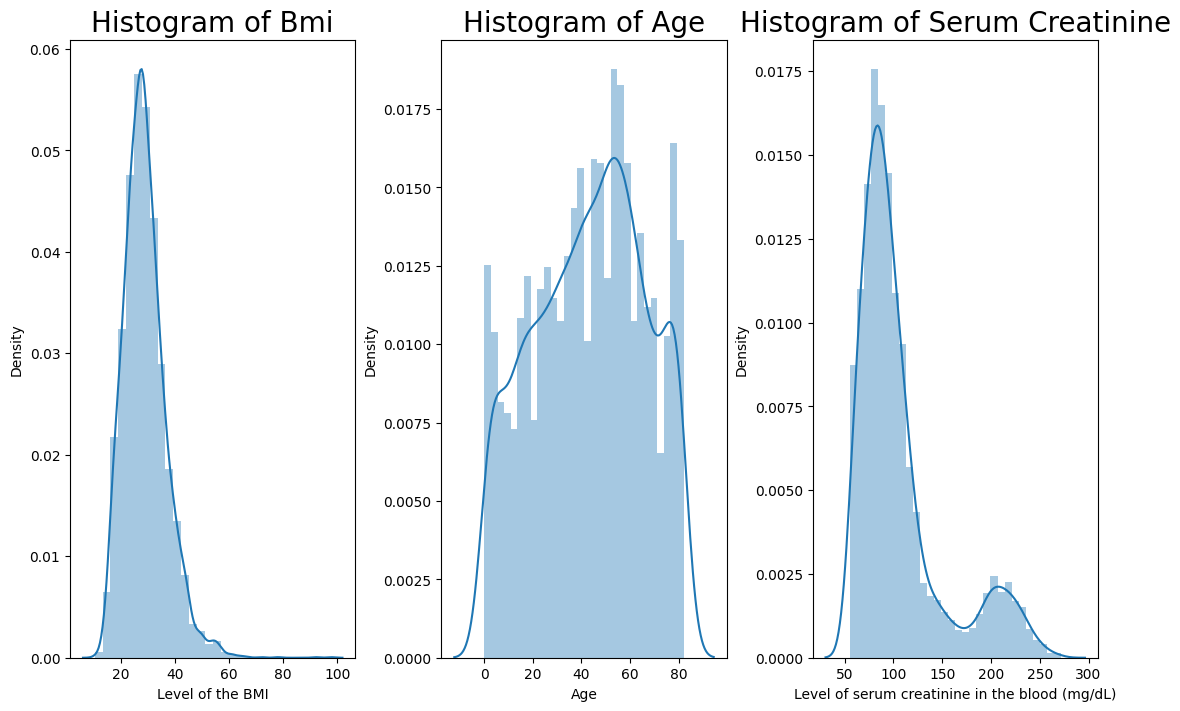

In [9]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(data.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(data.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(data.avg_glucose_level,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()


c:\Users\62687\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


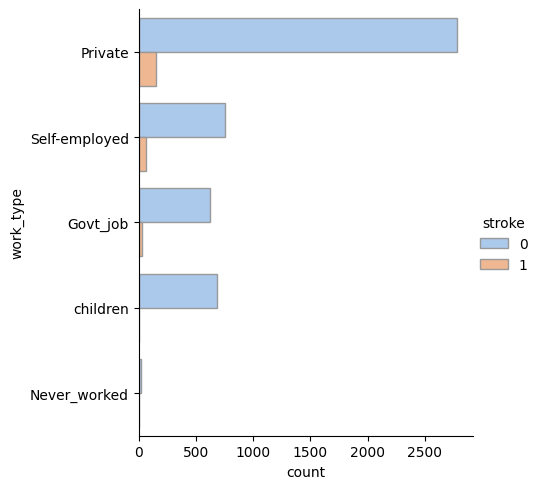

In [10]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

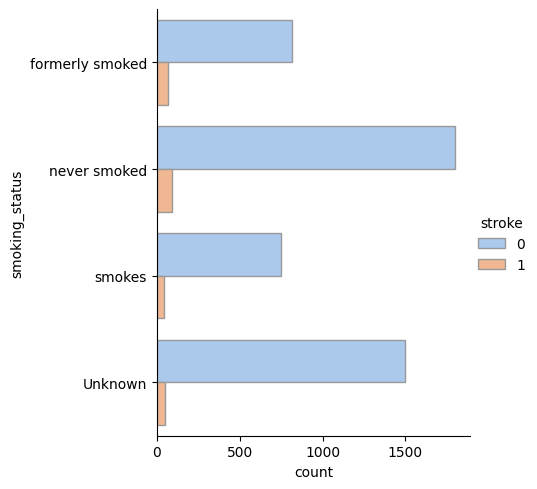

In [10]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

<Figure size 1700x700 with 0 Axes>

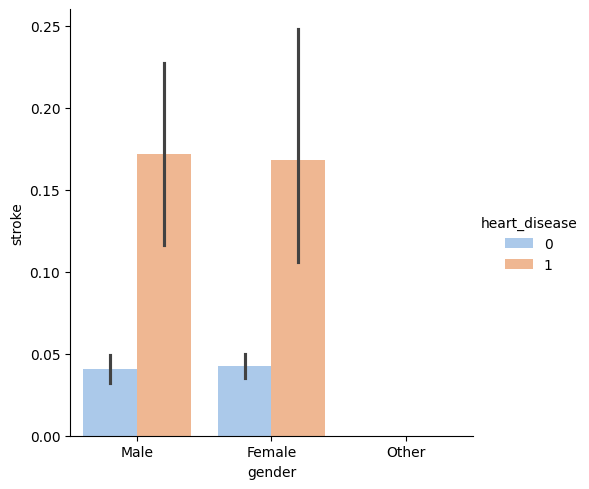

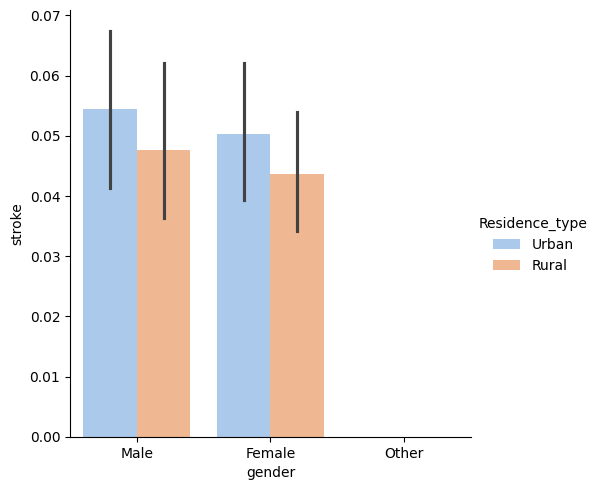

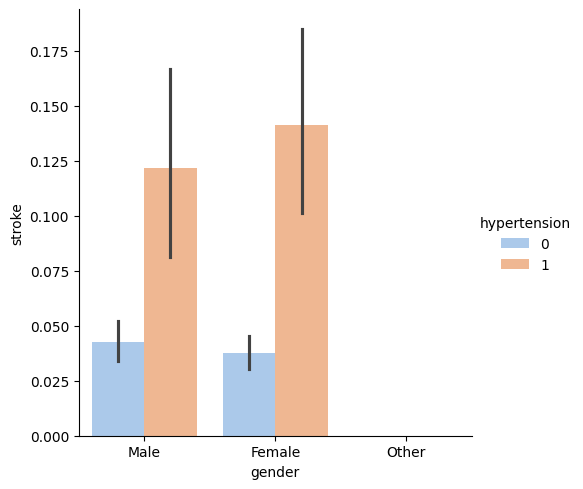

In [11]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=data)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=data)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=data)
plt.show()

In [12]:
import plotly.graph_objects as go
len_data = len(data)
len_w = len(data[data["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(data.loc[(data["stroke"]==1)&(data['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(data.loc[(data["stroke"]==1) & (data['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

In [15]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 ## Feature correlation to target

In [17]:
import plotly.express as px
fig = px.parallel_categories(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

C:\Users\zhong\AppData\Local\Temp\ipykernel_23120\878720614.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




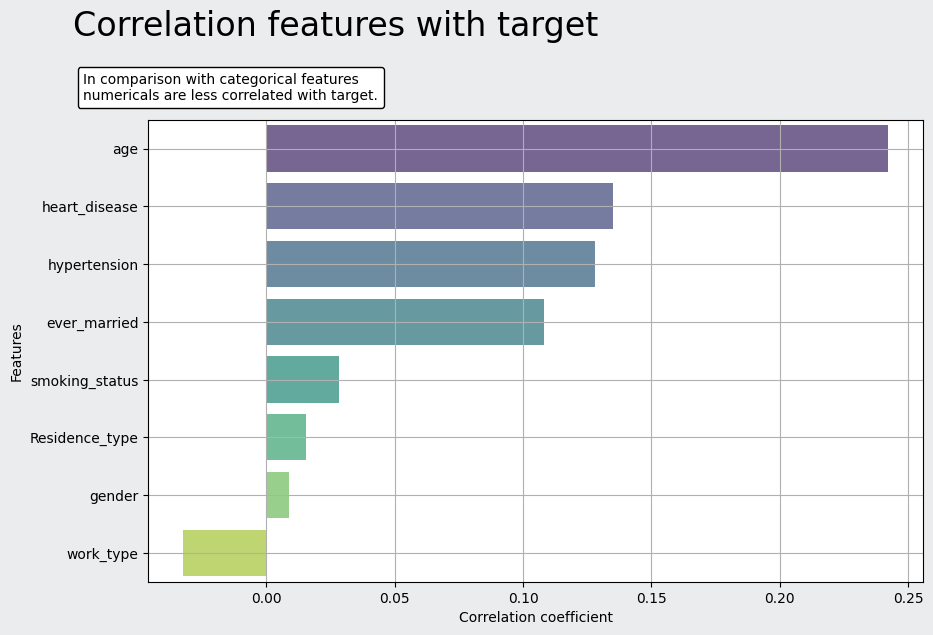

In [20]:
import numpy as np
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

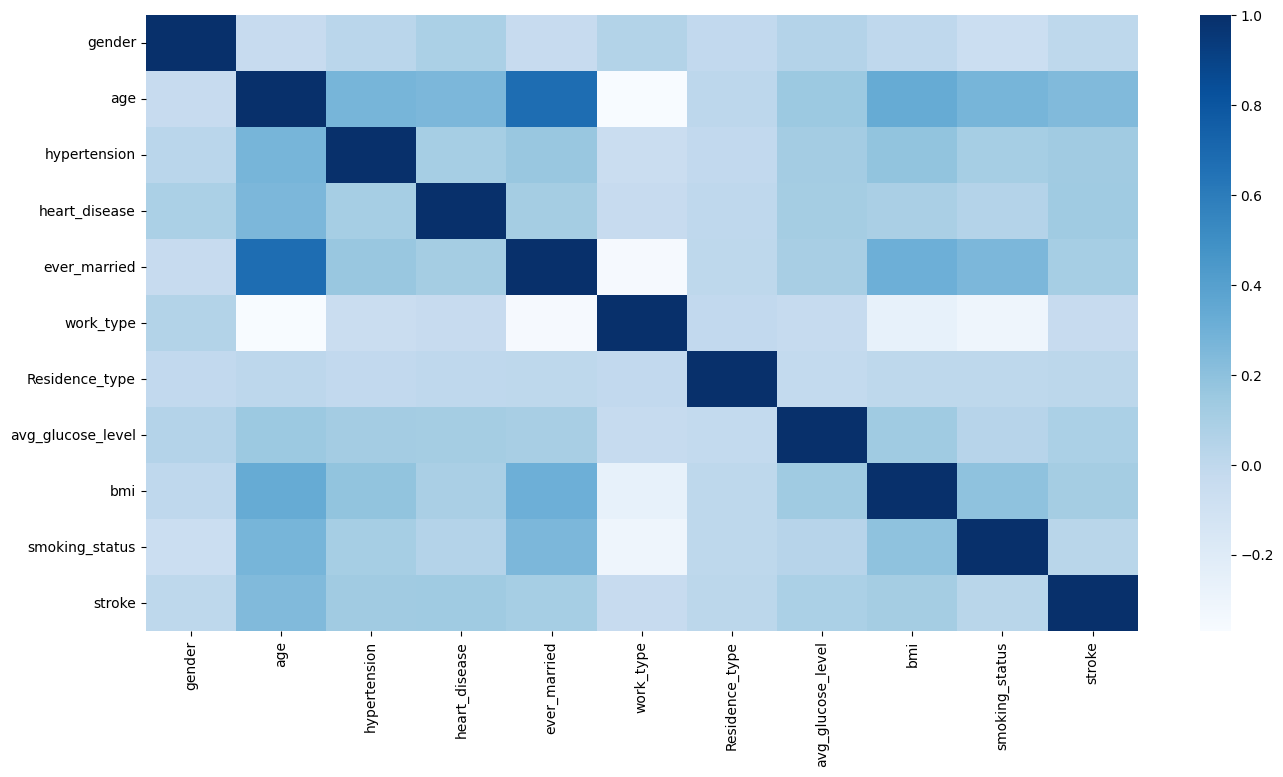

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

Feature ranking:
1. feature 1 (0.681038)
2. feature 7 (0.107527)
3. feature 5 (0.068106)
4. feature 3 (0.030871)
5. feature 0 (0.030857)
6. feature 2 (0.029756)
7. feature 6 (0.027659)
8. feature 4 (0.024185)


C:\Users\zhong\AppData\Local\Temp\ipykernel_23120\100358622.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




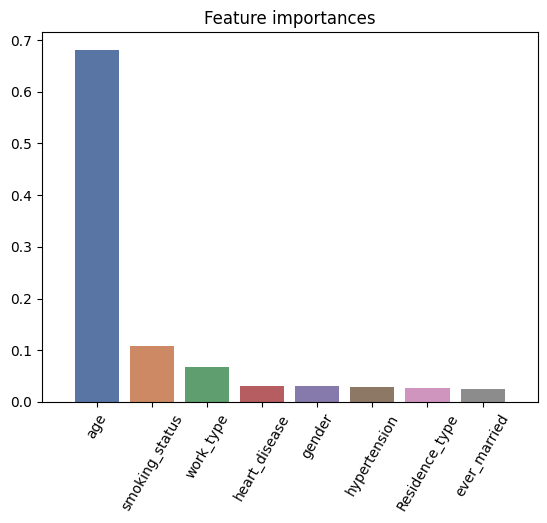

[0.01700819 0.05302412 0.01101275 0.01063593 0.01102508 0.02646599
 0.01939474 0.03688318]


In [34]:
from sklearn.ensemble import ExtraTreesClassifier

X = en_df[features]
y = en_df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep")

plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()


 ## Fixing the dataset (Missing values and unbalanced target class)
 ### 可以直接使用en_df_imputed做后续分析

In [5]:
from sklearn.impute import KNNImputer
en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)

array([[  1.,  88.,   0., ..., 239.,   1.,   1.],
       [  0.,  82.,   0., ..., 418.,   2.,   1.],
       [  1., 101.,   0., ..., 198.,   2.,   1.],
       ...,
       [  0.,  56.,   0., ..., 179.,   2.,   0.],
       [  1.,  72.,   0., ..., 129.,   1.,   0.],
       [  0.,  65.,   0., ..., 135.,   0.,   0.]])

In [26]:
en_df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
en_df_imputed

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,418,2,0
5106,0,102,0,0,1,3,1,3030,273,2,0
5107,0,56,0,0,1,3,0,1314,179,2,0
5108,1,72,0,0,1,2,0,3363,129,1,0


In [7]:
en_df_imputed.to_csv(os.path.join(data_dir, 'cleaned_data.csv'), index=False)